In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#DATA SET
df = pd.read_csv(r'/Users/lydrenjess/Downloads/finalset.csv')

a = df['Name'].to_numpy()
b = df['PPG'].to_numpy()
c = df['FG%'].to_numpy()
d = df['FT%'].to_numpy()


#INITIALS
col_title = df.columns.tolist()
col_cat = ['Player', 'Points Per Game', 'Field Goal Percentage', 'Free Throw Percentage']

#OUTPUTS
print("TOP 200 SCORERS DATA IN THE NATIONAL BASKETBALL ASSOCIATION (NBA)\n")

print("Data set columns:")
for i in range(len(col_cat)):
    print(i + 1, col_cat[i], col_title[i])
    
#proof of clean data set
print("\nOriginal Data Shape:", df.shape)
print("Missing Values:") 
print(df.isnull().sum())
print("\nTop 5 scorers:\n", df.head())

TOP 200 SCORERS DATA IN THE NATIONAL BASKETBALL ASSOCIATION (NBA)

Data set columns:
1 Player Name
2 Points Per Game PPG
3 Field Goal Percentage FG%
4 Free Throw Percentage FT%

Original Data Shape: (200, 4)
Missing Values:
Name    0
PPG     0
FG%     0
FT%     0
dtype: int64

Top 5 scorers:
                       Name   PPG   FG%   FT%
0  Shai Gilgeous-Alexander  32.7  51.9  89.8
1    Giannis Antetokounmpo  30.4  60.1  61.7
2             Nikola Jokic  29.6  57.6  80.0
3              Luka Doncic  28.2  45.0  78.2
4          Anthony Edwards  27.6  44.7  83.7


In [34]:
#numpy operations

sumppg = np.sum(b)
maxppg = np.max(b)
minppg = np.min(b)
meanfg = np.mean(c)
medianfg = np.median(c)
perfg = np.percentile(c, [90, 95, 99])
stdft = np.std(d)
varft = np.var(d)
rangeft = np.ptp(d)

print("\nPPG Statistics:")
print(f"Sum of PPG: {sumppg:.1f}")
print(f"Maximum of PPG: {maxppg:.1f}")
print(f"Minimum of PPG: {minppg:.1f}")

print("\nFG% Statistics:")
print(f"Mean of FG%: {meanfg:.1f}")
print(f"Median of FG%: {medianfg:.1f}")
print(f"90th, 95th, and 99th Percentile of FG%: {perfg}")

print("\nFT% Statistics:")
print(f"Standard Deviation of FT%: {stdft:.1f}")
print(f"Variance of FT%: {varft:.1f}")
print(f"Range of FT%: {rangeft:.1f}")



PPG Statistics:
Sum of PPG: 3229.0
Maximum of PPG: 32.7
Minimum of PPG: 9.7

FG% Statistics:
Mean of FG%: 47.4
Median of FG%: 46.2
90th, 95th, and 99th Percentile of FG%: [55.7   59.055 69.21 ]

FT% Statistics:
Standard Deviation of FT%: 7.9
Variance of FT%: 61.9
Range of FT%: 42.2


Array 1 [32.7 30.4 29.6 28.2 27.6] 
Array 2 [26.8 26.6 26.3 26.1 26. ] 
Array 3 [25.9 25.6 25.2 24.9 24.7] 
Array 4 [24.7 24.6 24.5 24.4 24.4]

One-Way Anova 

F-statistic: 23.7347, P-value: 0.00000392


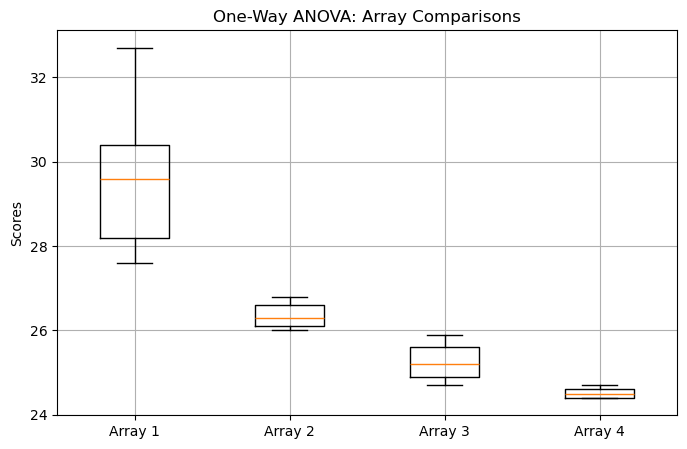


Z-Distribution

Z-score for first 5 values:
1.6687280980874446 0.3893698895537362 -0.055624269936246896 -0.8343640490437213 -1.1681096686612087 

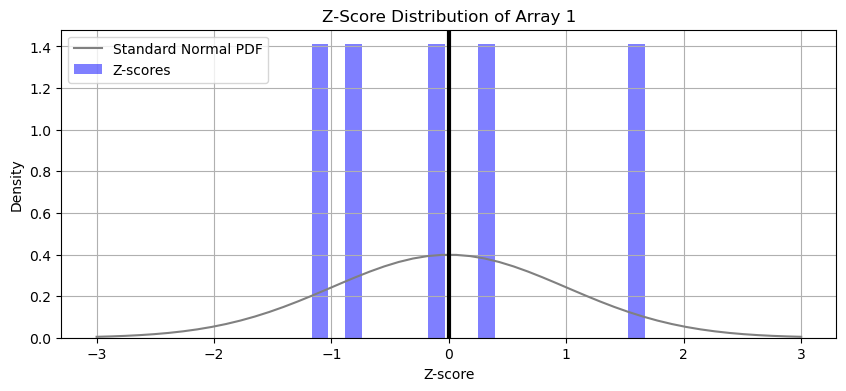

T - Test

T-test between Array 3 and Array 4: 
t = 3.25 
p = 0.012


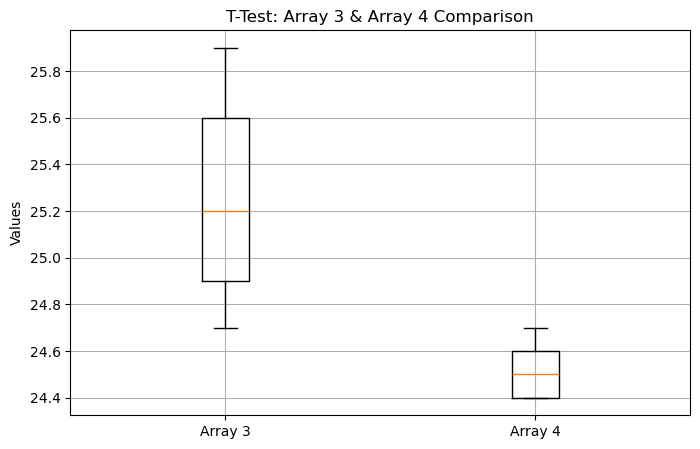

In [35]:
#scipy operations

#sampling the data set into 4 arrays (samples) with 5 values each
arr1 = np.array([])
arr2 = np.array([])
arr3 = np.array([])
arr4 = np.array([])
for i in range(20):
    if i < 5:
        arr1 = np.append(arr1, b[i])

    if i < 10 and i > 4:
        arr2 = np.append(arr2, b[i])

    if i < 15 and i > 9:
        arr3 = np.append(arr3, b[i])

    if i < 20 and i > 14:
        arr4 = np.append(arr4, b[i])

print("Array 1", arr1,"\nArray 2", arr2, "\nArray 3",arr3, "\nArray 4",arr4)

#one-way anova
f_statistic, p_value = stats.f_oneway(arr1, arr2, arr3, arr4)
print(f"\nOne-Way Anova \n\nF-statistic: {f_statistic:.4f}, P-value: {p_value:.8f}")

#plot
data = [arr1, arr2, arr3, arr4]
labels = ['Array 1', 'Array 2', 'Array 3', 'Array 4']

plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=labels)
plt.title('One-Way ANOVA: Array Comparisons')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

#standard normal
zval = stats.zscore(arr1)
print(f"\nZ-Distribution\n\nZ-score for first 5 values:")
for i in range(5):
    print(zval[i], end=' ')

#plot
z_range = np.linspace(-3, 3, 50)
pdf = stats.norm.pdf(z_range)

plt.figure(figsize=(10, 4))
plt.plot(z_range, pdf, color='gray', linestyle='-', label='Standard Normal PDF')

plt.hist(zval, bins=20, density=True, alpha=0.5, label='Z-scores', color='blue')

plt.axvline(0, color='black', linestyle='-', linewidth=3)
plt.title('Z-Score Distribution of Array 1')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#t-test
t_stat, p_value = stats.ttest_ind(arr3, arr4)
print(f"T - Test\n\nT-test between Array 3 and Array 4: \nt = {t_stat:.2f} \np = {p_value:.3f}")

#plot
plt.figure(figsize=(8, 5))
plt.boxplot([arr3, arr4], tick_labels=['Array 3', 'Array 4'])
plt.title('T-Test: Array 3 & Array 4 Comparison')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [36]:
#Statsmodels

x = sm.add_constant(df['FG%'])
model = sm.OLS(df['PPG'], x).fit()
print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    PPG   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5946
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.442
Time:                        18:05:37   Log-Likelihood:                -617.50
No. Observations:                 200   AIC:                             1239.
Df Residuals:                     198   BIC:                             1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8877   

Points Per Game PPG vs Field Goal Percentage FG%
Correlation coefficient (Pearson r): 0.05471644002914844


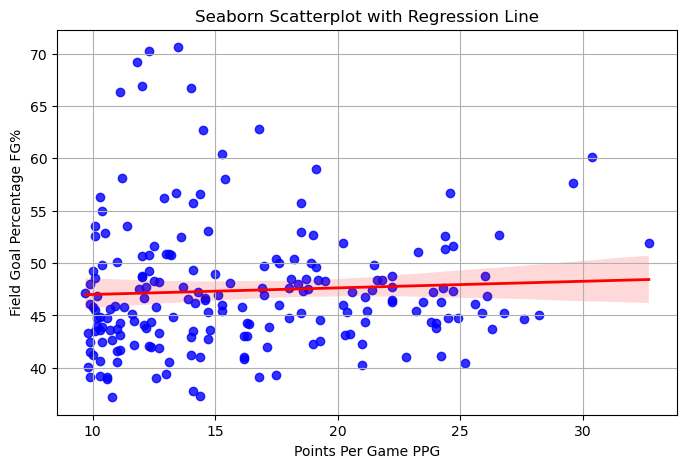


Points Per Game PPG vs Free Throw Percentage FT%
Correlation coefficient (Pearson r): 0.23400714910349046


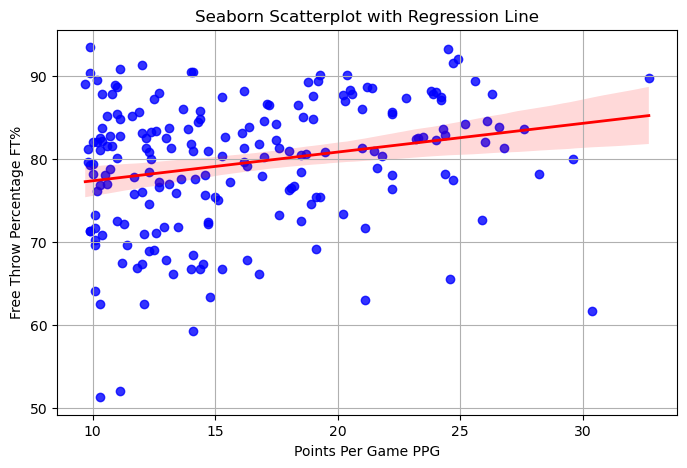


Field Goal Percentage FG% vs Free Throw Percentage FT%
Correlation coefficient (Pearson r): -0.44532098207584564


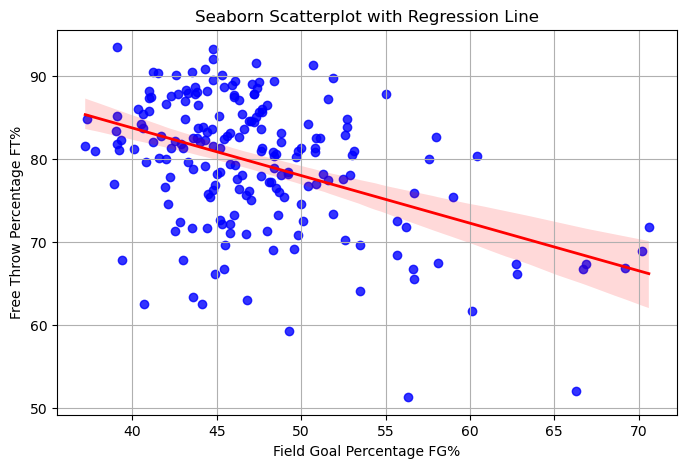

In [37]:
#correlation with visualizations
x = 1
y = 2

#corr1
corr_matrix = np.corrcoef(b, c)
correlation = corr_matrix[0, 1]
print(col_cat[x], col_title[x], "vs", col_cat[y], col_title[y])
print("Correlation coefficient (Pearson r):", correlation)
y += 1

#plot for corr1
ds = pd.DataFrame({'X': b, 'Y': c})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='blue', marker='o', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Points Per Game PPG')
plt.ylabel('Field Goal Percentage FG%')
plt.grid(True)
plt.show()

#corr2
corr_matrix = np.corrcoef(b, d)
correlation = corr_matrix[0, 1]
print()
print(col_cat[x], col_title[x], "vs", col_cat[y], col_title[y])
print("Correlation coefficient (Pearson r):", correlation)
x += 1

#plot for corr2
ds = pd.DataFrame({'X': b, 'Y': d})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='blue', marker='o', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Points Per Game PPG')
plt.ylabel('Free Throw Percentage FT%')
plt.grid(True)
plt.show()

#corr3
corr_matrix = np.corrcoef(c, d)
correlation = corr_matrix[0, 1]
print()
print(col_cat[x], col_title[x], "vs", col_cat[y], col_title[y])
print("Correlation coefficient (Pearson r):", correlation)

#plot for corr3
ds = pd.DataFrame({'X': c, 'Y': d})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='blue', marker='o', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Field Goal Percentage FG%')
plt.ylabel('Free Throw Percentage FT%')
plt.grid(True)
plt.show()

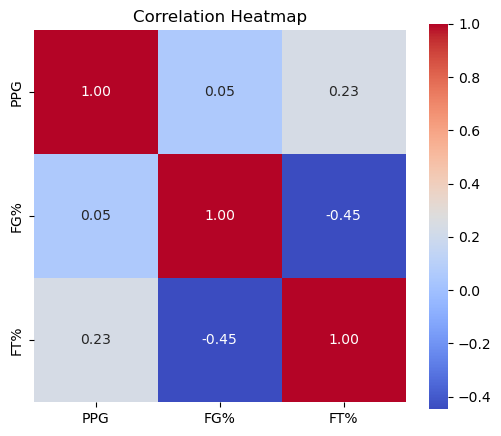

In [38]:
#seaborn

dx = pd.DataFrame({'PPG': b, 'FG%': c, 'FT%': d})
corr = dx.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
%history -g -f ranjo_revhis

File 'ranjo_revhis' exists. Overwrite?  Yes


Overwriting file.
